In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pathlib
import cv2
from glob import glob

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow. keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [3]:
#copy the downloaded datalink from downloads
path=pathlib.Path(r"C:\Users\USER\Downloads\archive (7)\test_set\test_set")

In [4]:
animal=['cats','dogs']

In [5]:
x=[]
y=[]

In [6]:
for i in animal:
  i_path=path.glob(str(i)+'\*.jpg')
  ind=animal.index(i)
  for j in i_path:
    img=cv2.imread(str(j))
    img=cv2.resize(img,(100,100))
    img=img/255
    x.append(img)
    y.append(ind)

In [7]:
len(x)

2023

In [8]:
len(y)

2023

In [9]:
#convert list(images) into number format
x=np.array(x)
y=np.array(y)

In [10]:
#x

In [11]:
x.shape

(2023, 100, 100, 3)

In [12]:
y.shape

(2023,)

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=.75,random_state=1)

In [14]:
xtrain.shape

(1517, 100, 100, 3)

In [15]:
xtest.shape

(506, 100, 100, 3)

In [16]:
len(xtrain),len(xtest)

(1517, 506)

In [17]:
len(ytrain),len(ytest)

(1517, 506)

In [18]:
model=Sequential()

In [19]:
# model.add(Conv2D(filters=50,kernel_size=(3,3),input_shape=(100,100,3),activation='relu',strides=1,padding='valid'))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',strides=1,padding='valid'))
# model.add(Maxpool2D(pool_size=(2,2)))
# model.add(Flatten())
# model.add(Dense(100,activation='relu'))
# model.add(Dense(2,activation='softmax'))



          

In [20]:
xtrain[0].shape

(100, 100, 3)

In [21]:
model.add(Conv2D(filters=50,kernel_size=(3,3),input_shape=(100,100,3),activation='relu',strides=1,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',strides=1,padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 50)      1400      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 50)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 100)       45100     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 100)      0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 62500)             0         
                                                                 
 dense (Dense)               (None, 100)               6

In [23]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [24]:
hist=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=20,batch_size=100)

Epoch 1/20
16/16 [==============================] - 28s 2s/step - loss: 1.1725 - accuracy: 0.4904 - val_loss: 0.6926 - val_accuracy: 0.5000
Epoch 2/20
16/16 [==============================] - 27s 2s/step - loss: 0.6918 - accuracy: 0.5267 - val_loss: 0.6885 - val_accuracy: 0.5375
Epoch 3/20
16/16 [==============================] - 26s 2s/step - loss: 0.6801 - accuracy: 0.5662 - val_loss: 0.6712 - val_accuracy: 0.5771
Epoch 4/20
16/16 [==============================] - 25s 2s/step - loss: 0.6614 - accuracy: 0.6177 - val_loss: 0.7284 - val_accuracy: 0.5375
Epoch 5/20
16/16 [==============================] - 25s 2s/step - loss: 0.6181 - accuracy: 0.6651 - val_loss: 0.7988 - val_accuracy: 0.5296
Epoch 6/20
16/16 [==============================] - 26s 2s/step - loss: 0.5555 - accuracy: 0.7132 - val_loss: 0.6418 - val_accuracy: 0.6364
Epoch 7/20
16/16 [==============================] - 26s 2s/step - loss: 0.4840 - accuracy: 0.7713 - val_loss: 0.6534 - val_accuracy: 0.6522
Epoch 8/20
16/16 [==

In [25]:
#save deep learning model
model.save("cat&dog.h5")

In [31]:
hist1=hist.history

In [32]:
hist1

{'loss': [1.1724950075149536,
  0.6917970776557922,
  0.6801109910011292,
  0.6614341139793396,
  0.6180530786514282,
  0.5555499196052551,
  0.48402053117752075,
  0.39811670780181885,
  0.3153213560581207,
  0.2571699917316437,
  0.21568462252616882,
  0.165571928024292,
  0.10565438121557236,
  0.07146628946065903,
  0.05828180909156799,
  0.04433543607592583,
  0.0315500907599926,
  0.02841688133776188,
  0.01437307521700859,
  0.007141318637877703],
 'accuracy': [0.4904416501522064,
  0.5266974568367004,
  0.5662491917610168,
  0.6176664233207703,
  0.6651285290718079,
  0.7132498621940613,
  0.771259069442749,
  0.826631486415863,
  0.8675016760826111,
  0.8971654772758484,
  0.9281476736068726,
  0.9386947751045227,
  0.9716545939445496,
  0.9835200905799866,
  0.988793671131134,
  0.9914304614067078,
  0.9953856468200684,
  0.9973632097244263,
  0.999340832233429,
  1.0],
 'val_loss': [0.6926324367523193,
  0.6885066628456116,
  0.6711885929107666,
  0.7284163236618042,
  0.798

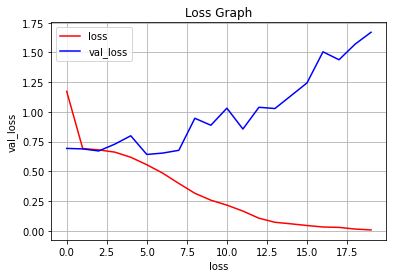

In [33]:
plt.plot(hist1['loss'],label="loss",color="r")
plt.plot(hist1['val_loss'],label="val_loss",color="b")
plt.title("Loss Graph")
plt.xlabel("loss")
plt.ylabel("val_loss")
plt.legend()
plt.grid()

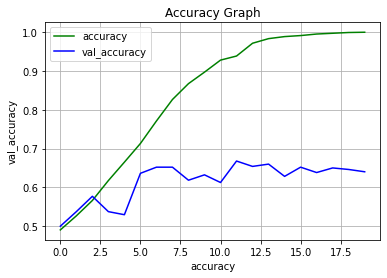

In [34]:
plt.plot(hist1['accuracy'],label="accuracy",color="g")
plt.plot(hist1['val_accuracy'],label="val_accuracy",color="b")
plt.title("Accuracy Graph")
plt.xlabel("accuracy")
plt.ylabel("val_accuracy")
plt.legend()
plt.grid()

In [35]:
from sklearn.metrics import confusion_matrix
y_pred=np.argmax(model.predict(xtest),axis=-1)

16/16 [==============================] - 2s 134ms/step


In [36]:
cm=confusion_matrix(ytest,y_pred)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

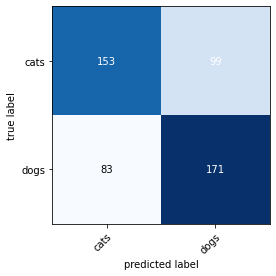

In [37]:
#overfitting condition
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm,class_names=("cats","dogs"))

In [42]:
#model prediction
import cv2
import numpy as np
#new model to number array format
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import load_model
import tensorflow as tf
import matplotlib.pyplot as plt

In [40]:
model=load_model("cat&dog.h5")

In [41]:
labels={"cats":0,"dogs":1}

In [45]:
def predict(img_path):
    img=load_img(str(img_path),target_size=(100,100))
    plt.imshow(img)
    img=img_to_array(img)
    img=img/255
    img=img.reshape(1,100,100,3)
    result=model.predict(img)
    for i in labels:
        if(np.argmax(result)==labels[i]):
            print(i)


1/1 [==============================] - 0s 136ms/step
cats


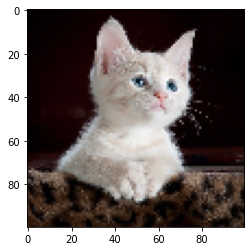

In [46]:
predict("kitty-cat-kitten-pet-45201.jpeg")

1/1 [==============================] - 0s 29ms/step
dogs


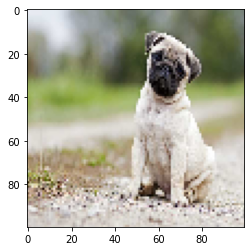

In [48]:
predict("dog.jpg")